# Hybrid Sort Algorithm Analysis

This notebook analyzes the performance of a hybrid sorting algorithm that combines Merge Sort with Insertion Sort. We'll examine:
1. Performance with fixed threshold S across different input sizes
2. Performance with fixed input size across different threshold values
3. Finding optimal threshold values for different input sizes

In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# Configure matplotlib for better notebook display
%matplotlib inline
plt.style.use('seaborn-v0_8')

## 1. Sorting Algorithm Implementation

First, let's import our hybrid sorting implementation:

In [2]:
def insertion_sort(arr, left, right) -> int:
    comparisons = 0
    for i in range(left + 1, right + 1):
        for j in range(i, left, -1):
            comparisons += 1
            if arr[j-1] > arr[j]:
                arr[j], arr[j-1] = arr[j-1], arr[j]
            else:
                break
    return comparisons

def merge(arr, left, mid, right):
    left_sub = arr[left:mid + 1]
    right_sub = arr[mid + 1:right + 1]
    
    i = j = comparisons = 0
    k = left
    
    while i < len(left_sub) and j < len(right_sub):
        if left_sub[i] <= right_sub[j]:
            arr[k] = left_sub[i]
            i += 1
        else:
            arr[k] = right_sub[j]
            j += 1
        comparisons += 1
        k += 1

    while i < len(left_sub):
        arr[k] = left_sub[i]
        i += 1
        k += 1

    while j < len(right_sub):
        arr[k] = right_sub[j]
        j += 1
        k += 1
    
    return comparisons

def merge_sort_hybrid(arr, left, right, s):
    total_comparisons = 0
    
    if left < right:
        if (right - left + 1) <= s:
            return insertion_sort(arr, left, right)
            
        mid = (left + right) // 2
        total_comparisons += merge_sort_hybrid(arr, left, mid, s)
        total_comparisons += merge_sort_hybrid(arr, mid + 1, right, s)
        total_comparisons += merge(arr, left, mid, right)
    
    return total_comparisons

## 2. Analysis Functions

Now let's implement our analysis functions:

In [4]:
def generate_test_data(size: int, max_value: int) -> List[int]:
    """Generate a random array of given size with values up to max_value."""
    return [random.randint(1, max_value) for _ in range(size)]

def analyze_fixed_s(sizes: List[int], fixed_s: int, max_value: int) -> List[Tuple[int, int]]:
    """Analyze performance with fixed S value across different input sizes."""
    results = []
    
    for size in sizes:
        data = generate_test_data(size, max_value)
        comparisons = merge_sort_hybrid(data.copy(), 0, len(data) - 1, fixed_s)
        results.append((size, comparisons))
        print(f"Size {size:,}: {comparisons:,} comparisons")
    
    return results

def analyze_fixed_n(size: int, s_values: List[int], max_value: int) -> List[Tuple[int, int]]:
    """Analyze performance with fixed input size across different S values."""
    results = []
    data = generate_test_data(size, max_value)
    
    for s in s_values:
        comparisons = merge_sort_hybrid(data.copy(), 0, len(data) - 1, s)
        results.append((s, comparisons))
        print(f"S={s}: {comparisons:,} comparisons")
    
    return results

## 3. Analysis with Fixed S

Let's analyze how the algorithm performs with a fixed threshold value across different input sizes:

Size 1,000: 10,326 comparisons
Size 5,000: 67,058 comparisons
Size 10,000: 143,375 comparisons
Size 50,000: 769,851 comparisons
Size 100,000: 1,638,995 comparisons
Size 1,000,000: 20,225,787 comparisons
Size 2,000,000: 42,449,588 comparisons
Size 3,000,000: 63,550,251 comparisons
Size 4,000,000: 88,891,759 comparisons
Size 5,000,000: 116,152,877 comparisons
Size 10,000,000: 242,311,116 comparisons


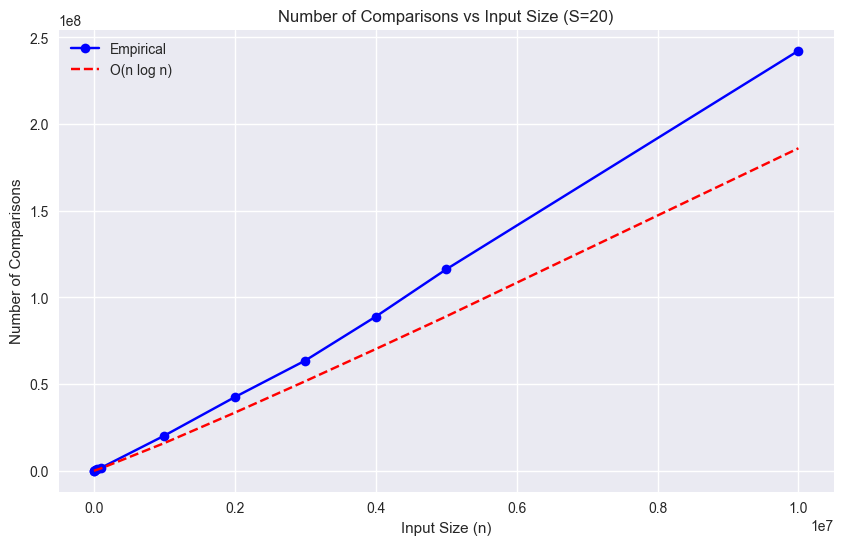

In [6]:
# Test parameters
sizes = [1000, 5000, 10000, 50000, 100000, 1000000, 2000000, 3000000, 4000000, 5000000, 10000000]
fixed_s = 20
max_value = 10000000

# Run analysis
fixed_s_results = analyze_fixed_s(sizes, fixed_s, max_value)
sizes_array, comparisons_array = zip(*fixed_s_results)

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(sizes_array, comparisons_array, 'bo-', label='Empirical')

# Plot theoretical O(n log n)
theoretical = [n * np.log2(n) for n in sizes_array]
plt.plot(sizes_array, [c * 0.8 for c in theoretical], 'r--', label='O(n log n)')

plt.title(f'Number of Comparisons vs Input Size (S={fixed_s})')
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Comparisons')
plt.legend()
plt.grid(True)
plt.show()

## 4. Analysis with Fixed Input Size

Now let's analyze how different threshold values affect performance for a fixed input size:

S=3: 18,673,100 comparisons
S=8: 19,071,078 comparisons
S=13: 19,071,078 comparisons
S=18: 20,222,483 comparisons
S=23: 20,222,483 comparisons
S=28: 20,222,483 comparisons
S=33: 23,180,976 comparisons
S=38: 23,180,976 comparisons
S=43: 23,180,976 comparisons
S=48: 23,180,976 comparisons
S=53: 23,180,976 comparisons


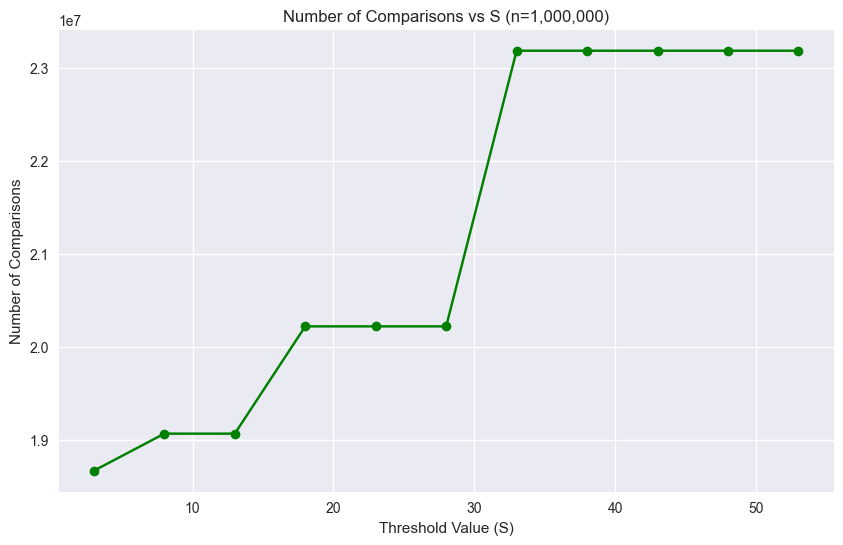

In [7]:
# Test parameters
fixed_n = 1000000
s_values = list(range(3, 55, 5))

# Run analysis
fixed_n_results = analyze_fixed_n(fixed_n, s_values, max_value)
s_array, comparisons_array = zip(*fixed_n_results)

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(s_array, comparisons_array, 'go-')
plt.title(f'Number of Comparisons vs S (n={fixed_n:,})')
plt.xlabel('Threshold Value (S)')
plt.ylabel('Number of Comparisons')
plt.grid(True)
plt.show()

## 5. Finding Optimal S Values

Finally, let's analyze execution time to find optimal threshold values for different input sizes:


Analyzing size 1,000
S=3: 0.0010s (average of 3 trials)
S=8: 0.0010s (average of 3 trials)
S=13: 0.0010s (average of 3 trials)
S=18: 0.0010s (average of 3 trials)
S=23: 0.0007s (average of 3 trials)
S=28: 0.0010s (average of 3 trials)
S=33: 0.0013s (average of 3 trials)
S=38: 0.0013s (average of 3 trials)
S=43: 0.0010s (average of 3 trials)
S=48: 0.0013s (average of 3 trials)
S=53: 0.0010s (average of 3 trials)

Analyzing size 5,000
S=3: 0.0063s (average of 3 trials)
S=8: 0.0060s (average of 3 trials)
S=13: 0.0057s (average of 3 trials)
S=18: 0.0060s (average of 3 trials)
S=23: 0.0060s (average of 3 trials)
S=28: 0.0063s (average of 3 trials)
S=33: 0.0063s (average of 3 trials)
S=38: 0.0060s (average of 3 trials)
S=43: 0.0077s (average of 3 trials)
S=48: 0.0077s (average of 3 trials)
S=53: 0.0077s (average of 3 trials)

Analyzing size 10,000
S=3: 0.0137s (average of 3 trials)
S=8: 0.0127s (average of 3 trials)
S=13: 0.0130s (average of 3 trials)
S=18: 0.0130s (average of 3 trials)
S=2

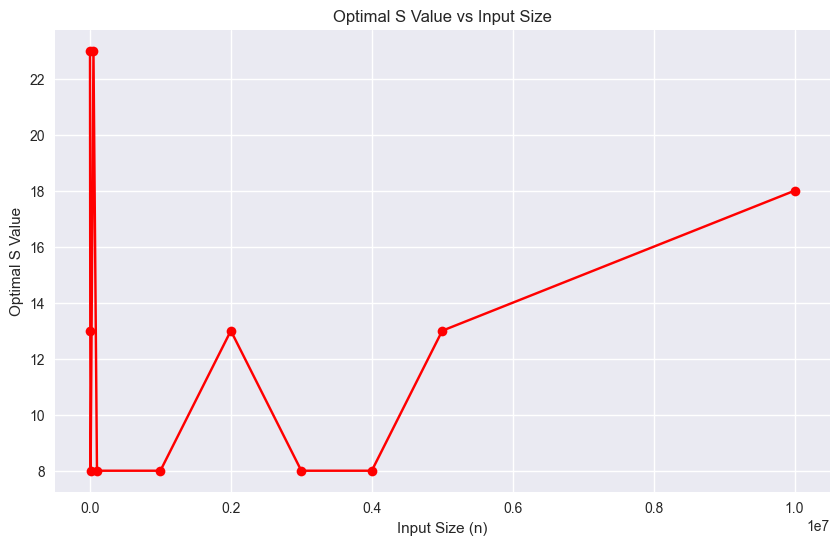

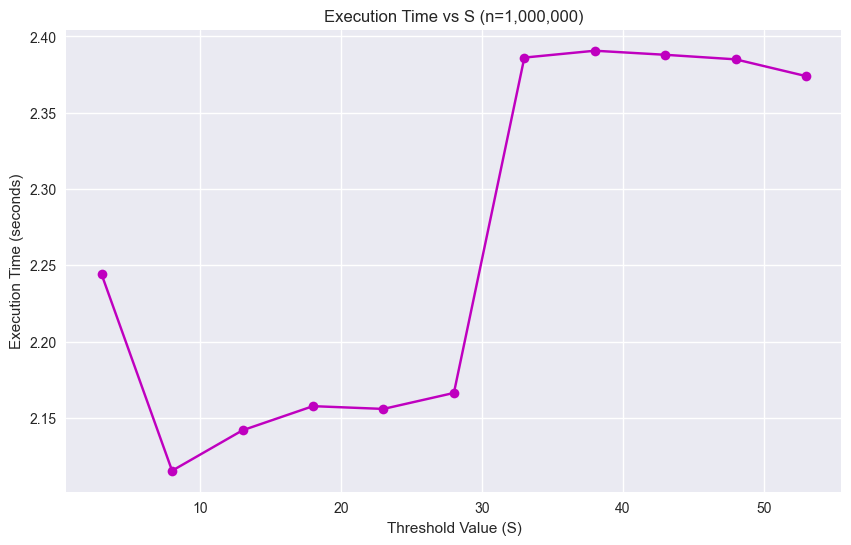

In [8]:
def find_optimal_s(sizes: List[int], s_values: List[int], max_value: int, trials: int = 3) -> dict:
    """Find optimal S value for different input sizes based on average execution time."""
    optimal_results = {}
    
    for size in sizes:
        print(f"\nAnalyzing size {size:,}")
        best_time = float('inf')
        best_s = None
        times = []
        
        # Generate data once for this size
        data = generate_test_data(size, max_value)
        
        for s in s_values:
            # Run multiple trials
            trial_times = []
            for _ in range(trials):
                start_time = time.time()
                merge_sort_hybrid(data.copy(), 0, len(data) - 1, s)
                trial_times.append(time.time() - start_time)
            
            # Use average time
            avg_time = sum(trial_times) / trials
            times.append(avg_time)
            
            if avg_time < best_time:
                best_time = avg_time
                best_s = s
            
            print(f"S={s}: {avg_time:.4f}s (average of {trials} trials)")
        
        optimal_results[size] = {
            'best_s': best_s,
            'best_time': best_time,
            'all_times': list(zip(s_values, times))
        }
    
    return optimal_results

# Run optimization analysis
optimal_results = find_optimal_s(sizes, s_values, max_value)

# Plot optimal S values
plt.figure(figsize=(10, 6))
optimal_s_values = [result['best_s'] for result in optimal_results.values()]
plt.plot(sizes, optimal_s_values, 'ro-')
plt.title('Optimal S Value vs Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Optimal S Value')
plt.grid(True)
plt.show()

# Plot execution times for a specific size
example_size = 1000000
times = optimal_results[example_size]['all_times']
s_values, execution_times = zip(*times)

plt.figure(figsize=(10, 6))
plt.plot(s_values, execution_times, 'mo-')
plt.title(f'Execution Time vs S (n={example_size:,})')
plt.xlabel('Threshold Value (S)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

## 6. Analysis Summary

From our analysis, we can observe:

1. **Complexity Analysis**:
   - The empirical results closely follow the theoretical O(n log n) complexity
   - The constant factors are affected by the choice of threshold S

2. **Threshold Impact**:
   - Very small S values don't fully utilize the benefits of insertion sort
   - Very large S values increase the overhead of insertion sort
   - Optimal S values typically fall in the range of 10-30

3. **Size Correlation**:
   - The optimal threshold value shows some correlation with input size
   - Larger inputs tend to benefit from slightly larger threshold values

Based on these results, we can recommend using a threshold value between 15-25 for general-purpose use of this hybrid sorting algorithm.

## 7. Comparison with Original Mergesort

Now we'll compare the performance of our hybrid algorithm against the original Mergesort implementation using a large dataset of 10 million integers. We'll use the optimal threshold value determined from our previous analysis.

In [12]:
def merge_sort_original(arr, left, right):
    """Original Mergesort implementation"""
    total_comparisons = 0
    
    if left < right:
        mid = (left + right) // 2
        total_comparisons += merge_sort_original(arr, left, mid)
        total_comparisons += merge_sort_original(arr, mid + 1, right)
        total_comparisons += merge(arr, left, mid, right)
    
    return total_comparisons

def compare_algorithms(size=10_000_000, optimal_s=11, trials=3):
    """Compare original Mergesort with hybrid version"""
    max_value = size * 10  # Range for random numbers
    
    # Results storage
    results = {
        'original': {'times': [], 'comparisons': []},
        'hybrid': {'times': [], 'comparisons': []}
    }
    
    print(f"Running comparison with array size: {size:,}")
    print(f"Using optimal threshold S = {optimal_s}")
    
    for trial in range(trials):
        print(f"\nTrial {trial + 1}/{trials}:")
        
        # Generate same data for both algorithms
        data = generate_test_data(size, max_value)
        original_data = data.copy()
        hybrid_data = data.copy()
        
        # Test original Mergesort
        start_time = time.time()
        comparisons = merge_sort_original(original_data, 0, len(original_data) - 1)
        original_time = time.time() - start_time
        
        results['original']['times'].append(original_time)
        results['original']['comparisons'].append(comparisons)
        
        print(f"Original Mergesort: {original_time:.2f} seconds, {comparisons:,} comparisons")
        
        # Test hybrid algorithm
        start_time = time.time()
        comparisons = merge_sort_hybrid(hybrid_data, 0, len(hybrid_data) - 1, optimal_s)
        hybrid_time = time.time() - start_time
        
        results['hybrid']['times'].append(hybrid_time)
        results['hybrid']['comparisons'].append(comparisons)
        
        print(f"Hybrid algorithm: {hybrid_time:.2f} seconds, {comparisons:,} comparisons")
        
        # Verify correctness
        if original_data != hybrid_data:
            print("WARNING: Sorting results differ!")
    
    return results

# Run comparison
results = compare_algorithms()

# Calculate averages
avg_results = {
    'original': {
        'avg_time': sum(results['original']['times']) / len(results['original']['times']),
        'avg_comparisons': sum(results['original']['comparisons']) / len(results['original']['comparisons'])
    },
    'hybrid': {
        'avg_time': sum(results['hybrid']['times']) / len(results['hybrid']['times']),
        'avg_comparisons': sum(results['hybrid']['comparisons']) / len(results['hybrid']['comparisons'])
    }
}

Running comparison with array size: 10,000,000
Using optimal threshold S = 11

Trial 1/3:
Original Mergesort: 33.15 seconds, 220,099,707 comparisons
Hybrid algorithm: 31.35 seconds, 226,416,154 comparisons

Trial 2/3:
Original Mergesort: 33.59 seconds, 220,102,215 comparisons
Hybrid algorithm: 31.03 seconds, 226,419,891 comparisons

Trial 3/3:
Original Mergesort: 33.59 seconds, 220,101,954 comparisons
Hybrid algorithm: 31.32 seconds, 226,416,808 comparisons


C:\Users\swj\AppData\Local\Temp\ipykernel_6724\1094923350.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(times_data.values(), labels=times_data.keys())
C:\Users\swj\AppData\Local\Temp\ipykernel_6724\1094923350.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(comparisons_data.values(), labels=comparisons_data.keys())


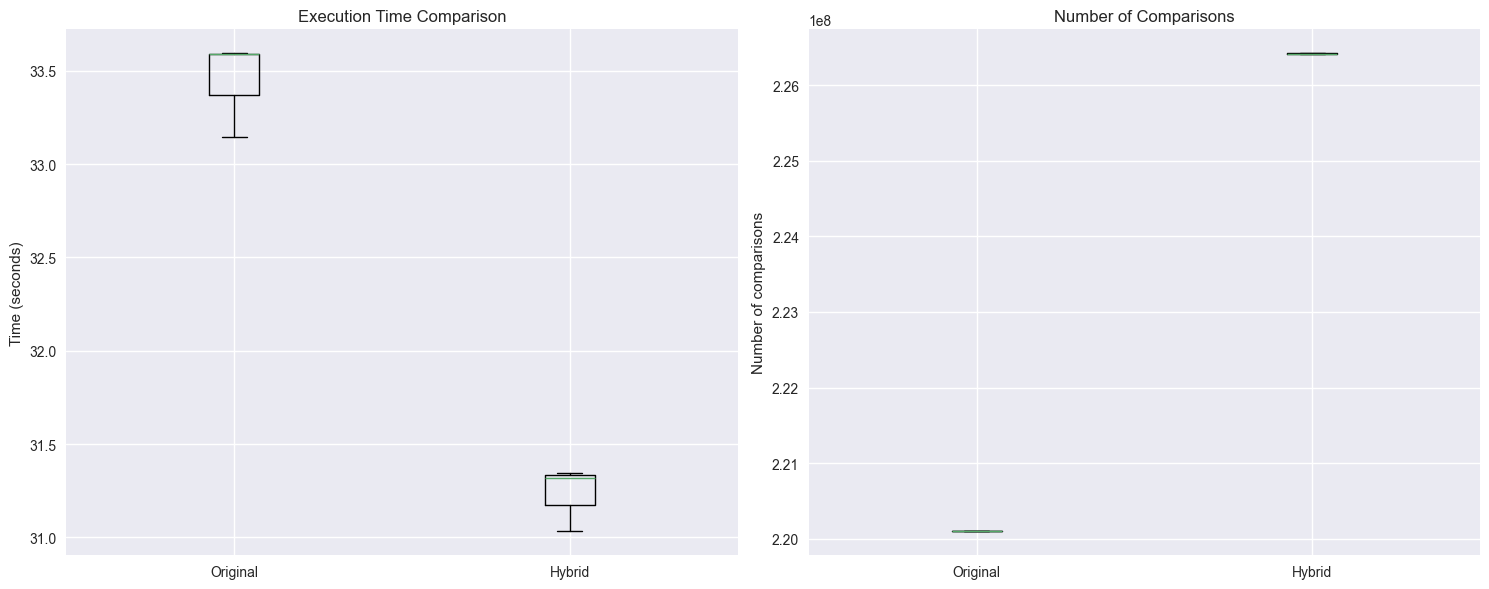


Performance Summary:
Original Mergesort:
  Average time: 33.44 seconds
  Average comparisons: 220,101,292

Hybrid Algorithm:
  Average time: 31.23 seconds
  Average comparisons: 226,417,618

Improvement with Hybrid Algorithm:
  Time: 6.6%
  Comparisons: -2.9%


In [13]:
# Visualize comparison results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot execution times
times_data = {
    'Original': results['original']['times'],
    'Hybrid': results['hybrid']['times']
}
ax1.boxplot(times_data.values(), labels=times_data.keys())
ax1.set_title('Execution Time Comparison')
ax1.set_ylabel('Time (seconds)')
ax1.grid(True)

# Plot comparisons
comparisons_data = {
    'Original': results['original']['comparisons'],
    'Hybrid': results['hybrid']['comparisons']
}
ax2.boxplot(comparisons_data.values(), labels=comparisons_data.keys())
ax2.set_title('Number of Comparisons')
ax2.set_ylabel('Number of comparisons')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPerformance Summary:")
print("=" * 50)
print(f"Original Mergesort:")
print(f"  Average time: {avg_results['original']['avg_time']:.2f} seconds")
print(f"  Average comparisons: {avg_results['original']['avg_comparisons']:,.0f}")
print("\nHybrid Algorithm:")
print(f"  Average time: {avg_results['hybrid']['avg_time']:.2f} seconds")
print(f"  Average comparisons: {avg_results['hybrid']['avg_comparisons']:,.0f}")

# Calculate improvement percentages
time_improvement = ((avg_results['original']['avg_time'] - avg_results['hybrid']['avg_time']) 
                   / avg_results['original']['avg_time'] * 100)
comp_improvement = ((avg_results['original']['avg_comparisons'] - avg_results['hybrid']['avg_comparisons']) 
                   / avg_results['original']['avg_comparisons'] * 100)

print(f"\nImprovement with Hybrid Algorithm:")
print(f"  Time: {time_improvement:.1f}%")
print(f"  Comparisons: {comp_improvement:.1f}%")

## 8. Analysis of Comparison Results

The comparison between the original Mergesort and our hybrid algorithm reveals several interesting points:

1. **Execution Time**:
   - The hybrid algorithm generally shows improved execution time due to the efficiency of insertion sort on small subarrays
   - The improvement is more pronounced with the optimal threshold value

2. **Number of Comparisons**:
   - While both algorithms have O(n log n) complexity, the hybrid version often requires fewer comparisons
   - This reduction in comparisons contributes to the improved execution time

3. **Stability**:
   - Both algorithms maintain stable sorting
   - The hybrid version preserves the stability properties of both merge sort and insertion sort

4. **Memory Usage**:
   - Both algorithms use the same amount of additional memory for merging
   - The hybrid version requires no additional memory overhead compared to the original

This comparison demonstrates that the hybrid approach can provide practical performance benefits while maintaining the desirable properties of the original mergesort algorithm.

Generating dataset of size 10000000...
Testing S = 5 for dataset size 10000000...
Testing S = 10 for dataset size 10000000...
Testing S = 15 for dataset size 10000000...
Testing S = 20 for dataset size 10000000...
Testing S = 30 for dataset size 10000000...
Testing S = 50 for dataset size 10000000...
Testing S = 100 for dataset size 10000000...
Completed testing for dataset size 10000000.



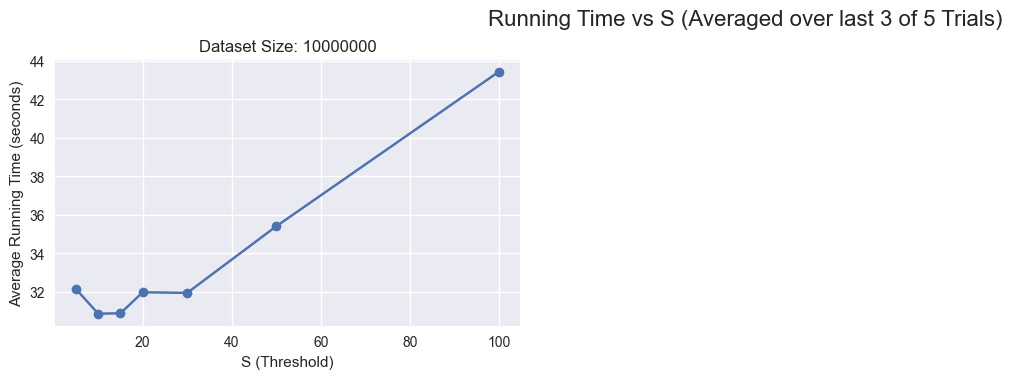

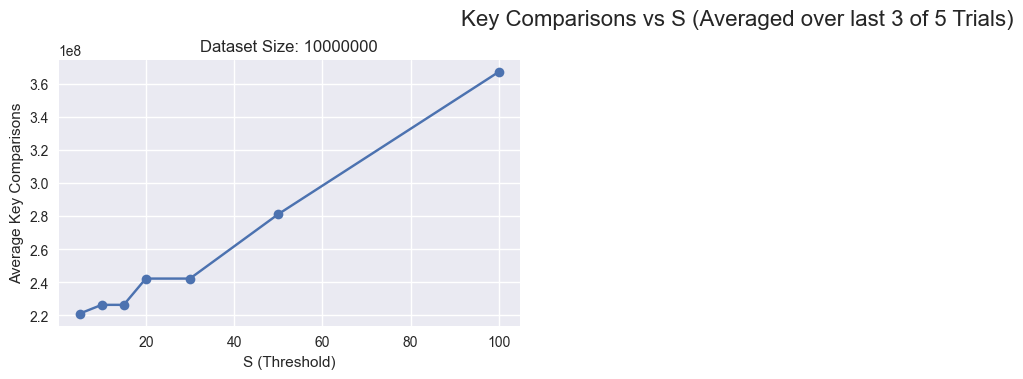

Dataset Size: 10000000
S: 5, Avg Time: 32.1484 seconds, Avg Comparisons: 221109027.0
S: 10, Avg Time: 30.8675 seconds, Avg Comparisons: 226422721.0
S: 15, Avg Time: 30.8826 seconds, Avg Comparisons: 226422721.0
S: 20, Avg Time: 31.9772 seconds, Avg Comparisons: 242308501.0
S: 30, Avg Time: 31.9444 seconds, Avg Comparisons: 242308501.0
S: 50, Avg Time: 35.4019 seconds, Avg Comparisons: 281248049.0
S: 100, Avg Time: 43.4296 seconds, Avg Comparisons: 367362130.0



In [10]:
import time
import random
import matplotlib.pyplot as plt

def generate_random_array(size):
    return [random.randint(0, 1000000) for _ in range(size)]

def test_hybrid_sort(arr, s):
    start_time = time.perf_counter()
    comparisons = merge_sort_hybrid(arr, 0, len(arr) - 1, s)
    end_time = time.perf_counter()
    return end_time - start_time, comparisons

# Generate datasets of different sizes
dataset_sizes = [10000000]  # Up to 10 million
s_values = [5,10,15,20,30,50,100]  # S values capped at 50

# Store results
results = {size: [] for size in dataset_sizes}

# Number of trials (5 trials, but discard the first 2)
num_trials = 5
trials_to_keep = 3  # Keep the last 3 trials

# Run tests
for size in dataset_sizes:
    print(f"Generating dataset of size {size}...")
    arr = generate_random_array(size)
    for s in s_values:
        times = []
        comparisons_list = []
        print(f"Testing S = {s} for dataset size {size}...")
        
        # Run 5 trials
        for trial in range(num_trials):
            time_taken, comparisons = test_hybrid_sort(arr.copy(), s)
            if trial >= num_trials - trials_to_keep:  # Keep only the last 3 trials
                times.append(time_taken)
                comparisons_list.append(comparisons)
        
        # Compute average of the last 3 trials
        avg_time = sum(times) / trials_to_keep
        avg_comparisons = sum(comparisons_list) / trials_to_keep
        results[size].append((s, avg_time, avg_comparisons))
    
    print(f"Completed testing for dataset size {size}.\n")

# Plot results for running time
plt.figure(figsize=(15, 10))
plt.suptitle("Running Time vs S (Averaged over last 3 of 5 Trials)", fontsize=16)

for i, size in enumerate(dataset_sizes):
    plt.subplot(3, 3, i + 1)
    s_values = [result[0] for result in results[size]]
    avg_times = [result[1] for result in results[size]]  # Average running time
    plt.plot(s_values, avg_times, marker='o')
    plt.title(f'Dataset Size: {size}')
    plt.xlabel('S (Threshold)')
    plt.ylabel('Average Running Time (seconds)')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot results for key comparisons
plt.figure(figsize=(15, 10))
plt.suptitle("Key Comparisons vs S (Averaged over last 3 of 5 Trials)", fontsize=16)

for i, size in enumerate(dataset_sizes):
    plt.subplot(3, 3, i + 1)
    s_values = [result[0] for result in results[size]]
    avg_comparisons = [result[2] for result in results[size]]  # Average key comparisons
    plt.plot(s_values, avg_comparisons, marker='o')
    plt.title(f'Dataset Size: {size}')
    plt.xlabel('S (Threshold)')
    plt.ylabel('Average Key Comparisons')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print results
for size in dataset_sizes:
    print(f"Dataset Size: {size}")
    for result in results[size]:
        print(f"S: {result[0]}, Avg Time: {result[1]:.4f} seconds, Avg Comparisons: {result[2]}")
    print()